# Training a Binary Classifier in Keras using Artificial Neural Networks.

<h4>Importing libraries</h4>

In [449]:
import numpy as np
import pandas as pd
import seaborn as sns
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler

<h4>Reading Data</h4>

In [415]:
data=pd.read_csv("pima-indians-diabetes.csv")
print(data.columns)
print(data.shape)
data.head()

Index(['Number of times pregnant', 'Plasma glucose',
       'Diastolic blood pressure', 'Triceps skinfold thickness',
       'serum insulin', 'Body mass index ', 'Diabetes pedigree function',
       'Age', 'Diabetes'],
      dtype='object')
(768, 9)


,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,85,66,29,0,26.6,0.351,31,No
2,8,183,64,0,0,23.3,0.672,32,Yes
3,1,89,66,23,94,28.1,0.167,21,No
4,0,137,40,35,168,43.1,2.288,33,Yes


><li>The Feature are self explanatory.</li><br>
><li>The Target Variable is Diabetes.</li>

In [450]:
data.describe()

,Plasma glucose,Diastolic blood pressure,Body mass index,Diabetes pedigree function,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-9.251859e-18,1.503427e-17,2.590520e-16,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-3.783654e+00,-3.572597e+00,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-6.852363e-01,-3.673367e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-1.218877e-01,1.496408e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.057709e-01,5.632228e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,2.444478e+00,2.734528e+00,4.455807e+00,5.883565e+00,4.063716e+00


<h4>Missing Values</h4>

In [417]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Number of times pregnant      768 non-null int64
Plasma glucose                768 non-null int64
Diastolic blood pressure      768 non-null int64
Triceps skinfold thickness    768 non-null int64
serum insulin                 768 non-null int64
Body mass index               768 non-null float64
Diabetes pedigree function    768 non-null float64
Age                           768 non-null int64
Diabetes                      768 non-null object
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


>There are no missing values.

<h4>Distribution of Target Variable.</h4>

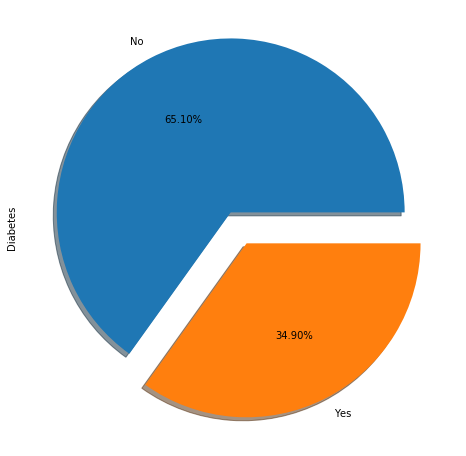

In [418]:
data['Diabetes'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.2f%%',shadow=True,figsize=(10,8))

>Clearly , the classes are not imbalanced .

<h4>Numerical Features </h4>

In [419]:
num_cols = data._get_numeric_data().columns
num_cols

Index(['Number of times pregnant', 'Plasma glucose',
       'Diastolic blood pressure', 'Triceps skinfold thickness',
       'serum insulin', 'Body mass index ', 'Diabetes pedigree function',
       'Age'],
      dtype='object')

>These are the Numerical Features of our dataset.

<h4>Distribution of Target Feature within various Predictors</h4>

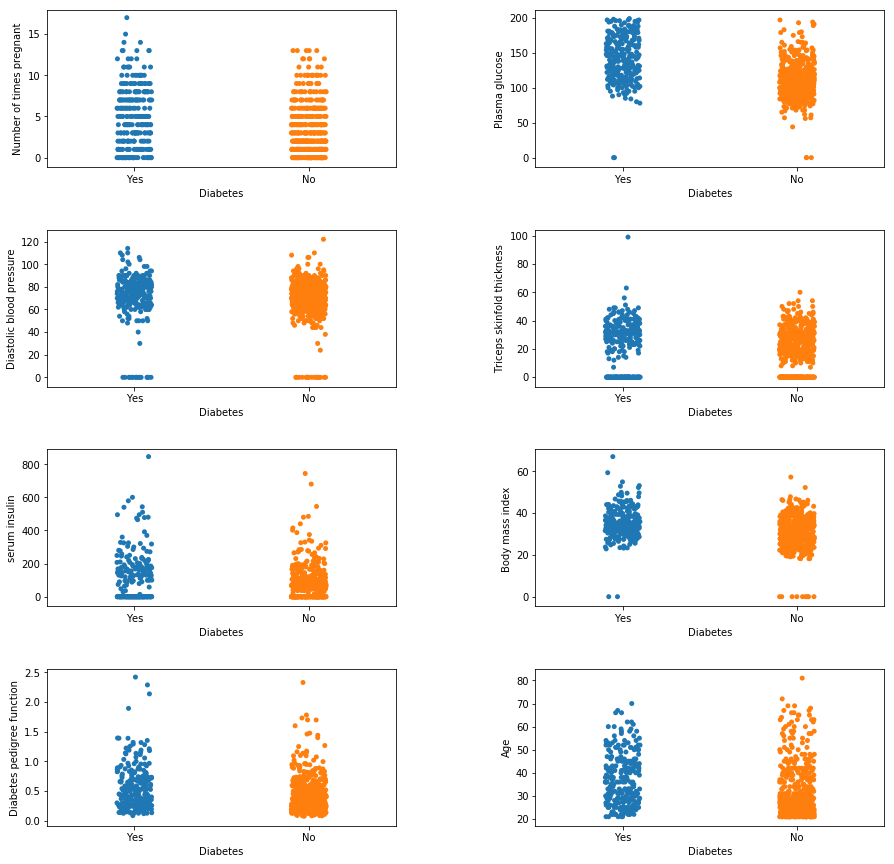

In [420]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
k=1
for i,j in enumerate(num_cols):
        ax = fig.add_subplot(4, 2, k)
        k=k+1
        sns.stripplot(x="Diabetes", y=j, data=data)

>There is no direct pattern in the above figures which can be exploited to make predictions.

<h4>Encoding Target(Categorical) Features.</h4>

In [421]:
data["Diabetes"]=data["Diabetes"].apply(lambda x:1 if x =="Yes" else 0)

<h4>StandardScaler</h4>

In [422]:
scaler = StandardScaler()
print(scaler.fit(data[num_cols]))
data[num_cols]=scaler.transform(data[num_cols])

StandardScaler(copy=True, with_mean=True, with_std=True)


In [423]:
print(data[num_cols].mean())

Number of times pregnant      2.544261e-17
Plasma glucose                3.614007e-18
Diastolic blood pressure     -1.327244e-17
Triceps skinfold thickness    7.994184e-17
serum insulin                -3.556183e-17
Body mass index               2.295979e-16
Diabetes pedigree function    2.398978e-16
Age                           1.857600e-16
dtype: float64


>The new mean is close to zero.

In [424]:
print(data[num_cols].var())

Number of times pregnant      1.001304
Plasma glucose                1.001304
Diastolic blood pressure      1.001304
Triceps skinfold thickness    1.001304
serum insulin                 1.001304
Body mass index               1.001304
Diabetes pedigree function    1.001304
Age                           1.001304
dtype: float64


>The new variance is close to one.

<h4>Distribution of Numerical Features</h4>

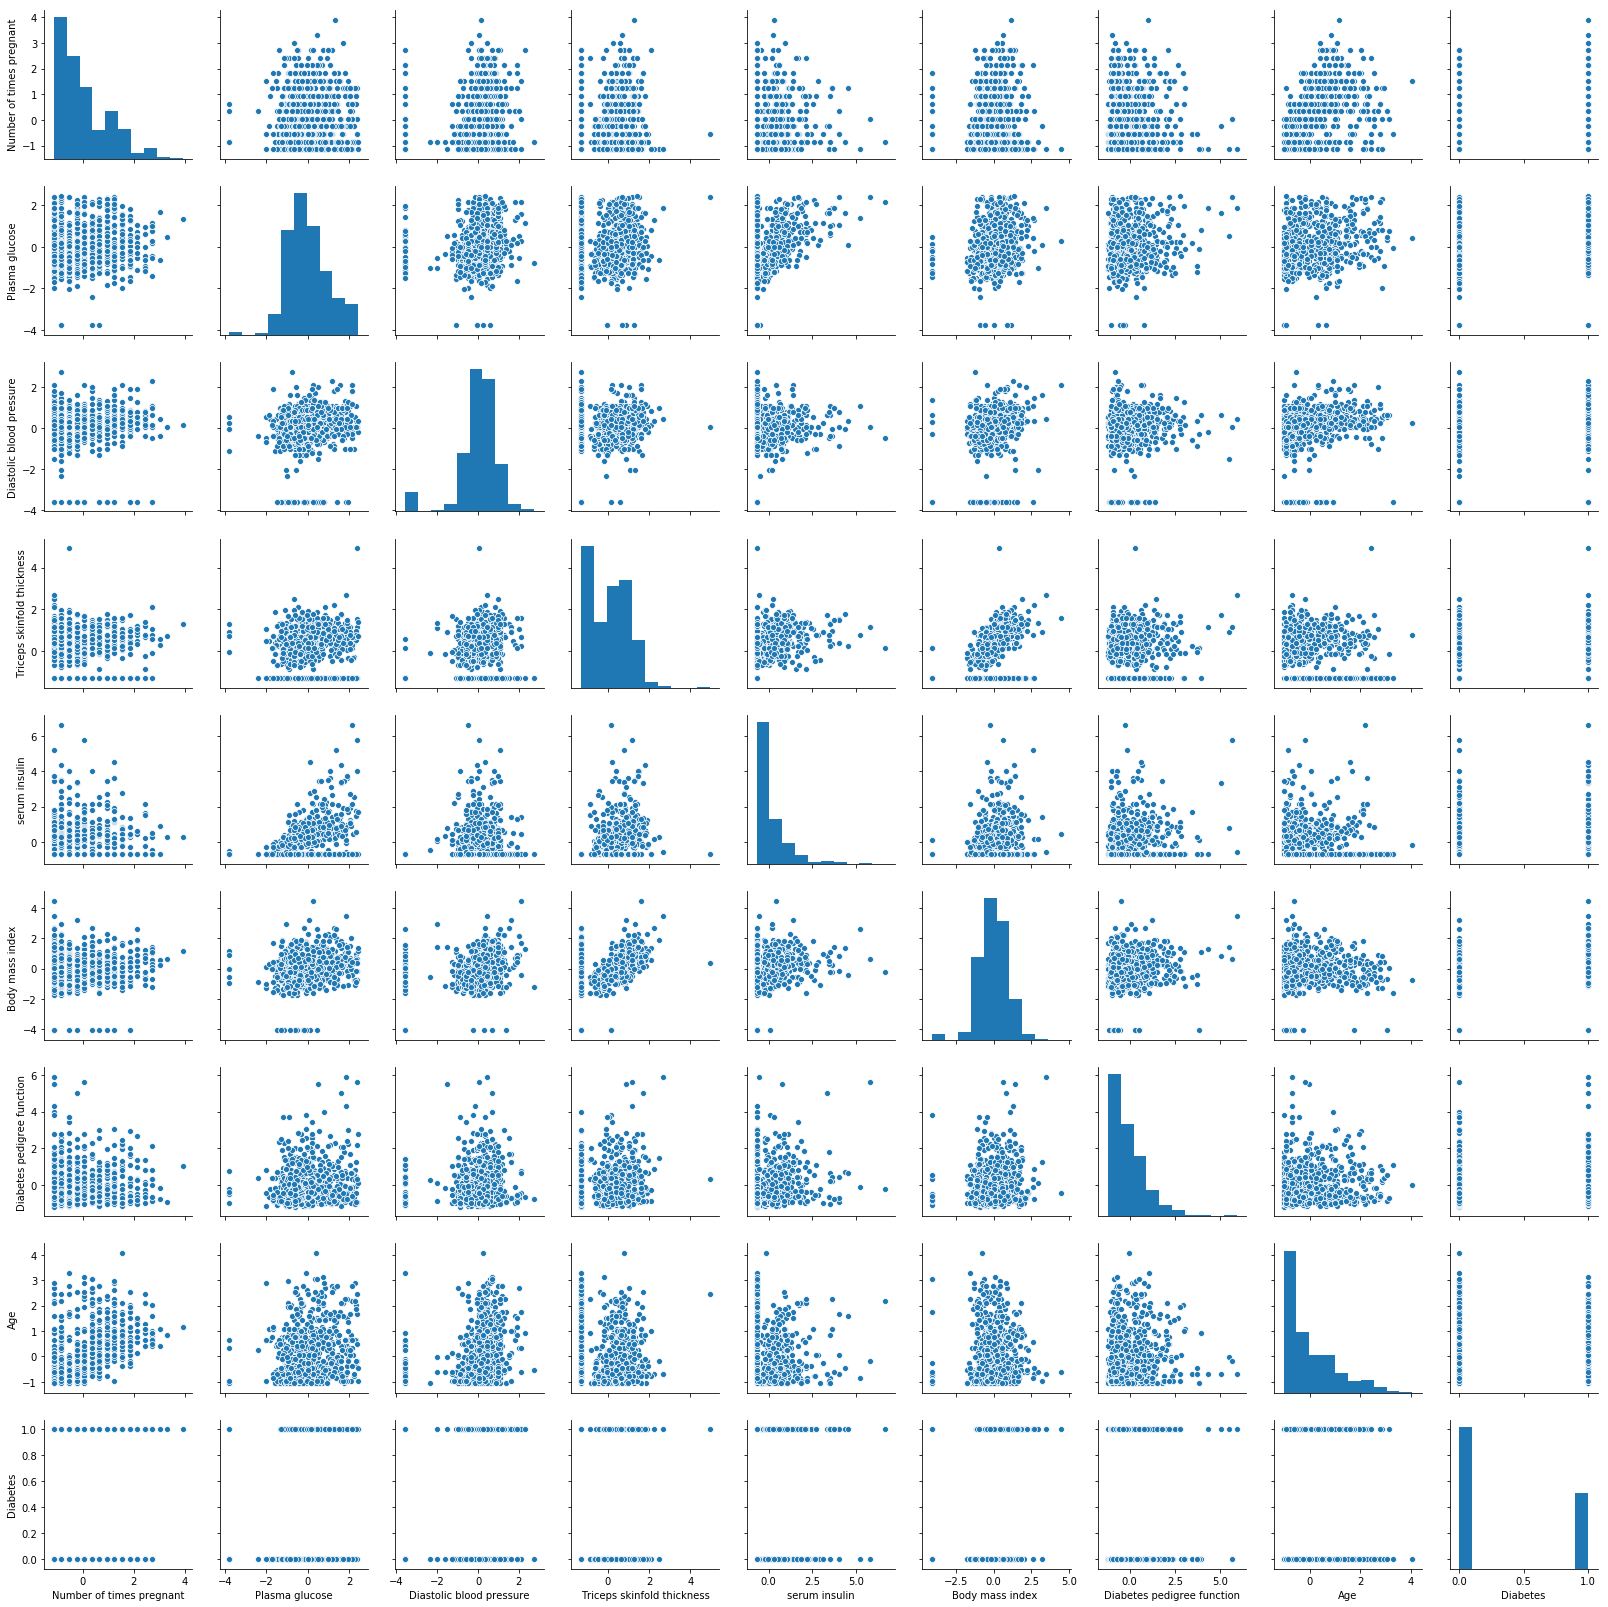

In [426]:
sns.pairplot(data)

Clearly , <br>
><li>the Body mass index and Triceps skinfold thickness shows some correlation.</li><br>
><li>the serum insulin and Triceps skinfold thickness shows some correlation.</li><br>
><li>the serum insulin and Plasma glucose shows some correlation.</li>

<h4>Correlation</h4>

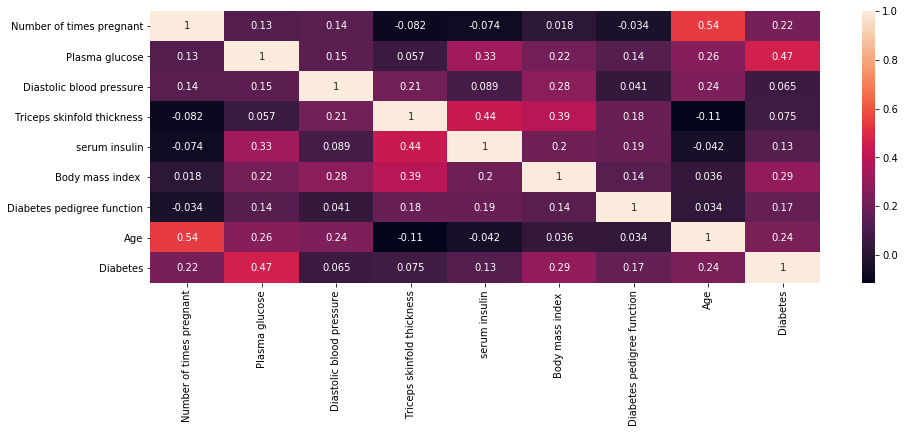

In [427]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
sns.heatmap(data.corr(), annot=True)

Observtions:-
<li>Corr(Number of times pregnant,Age) = 0.54 and Corr(Number of times pregnant,Diabetes) = 0.22 and Corr(Age,Diabetes) = 0.24</li>
>Hence, we will try removing "Number of times pregnant".

<br>

<li>Corr(Plasma glucose,serum insulin) = 0.54 and Corr(Plasma glucose,Diabetes) = 0.47 and Corr(serum insulin,Diabetes) = 0.13</li>
>Hence, we will try removing "serum insulin".

<br>
<li>
Corr(Triceps skinfold thickness,Body mass index) = 0.39 and Corr(Triceps skinfold thickness,Diabetes) = 0.075 and Corr(Body mass index,Diabetes) = 0.29</li>
>Hence, we will try removing "Triceps skinfold thickness"

In [428]:
to_drop=["Number of times pregnant","serum insulin","Triceps skinfold thickness","Diabetes"]

In [437]:
target=data["Diabetes"]
print(data.shape)
print(to_drop)
data=data.drop(to_drop, axis=1)
print(data.shape)
input_dimension=data.shape[1]

(768, 9)
['Number of times pregnant', 'serum insulin', 'Triceps skinfold thickness', 'Diabetes']
(768, 5)


>The less contributing features have been removed now.

In [448]:
data.columns

Index(['Plasma glucose', 'Diastolic blood pressure', 'Body mass index ',
       'Diabetes pedigree function', 'Age'],
      dtype='object')

<h3>Model Building</h3>

In [459]:
model = Sequential()
model.add(Dense(5, input_dim=input_dimension,activation="relu",kernel_initializer='random_normal'))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid",kernel_initializer='random_normal'))
model.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

><li>We have 5 input features , one target variable and 1 Hidden layer and 1 Dropout layer.</li> 
><li>The Dropout layer randomly sets input units to 0 with a frequency of 0.5 at each step during training time, which helps prevent overfitting.</li>
><li>The hidden layer will have 5 nodes.</li>
><li>ReLu will be the activation function for hidden layers.</li> 
><li>As this is a binary classification problem, we will use sigmoid as the activation function.</li>
><li>Dense layer implements</li><br>
>>output = activation(dot(input, kernel) + bias) <br><br>
kernel is the weight matrix. <br>kernel initialization defines the way to set the initial random weights of Keras layers.

<h5>Model weights and summary</h5>

In [467]:
print(model.layers[0].get_weights()[0].shape)
print(model.layers[0].get_weights()[1].shape)
print(model.layers[1].get_weights())
print(model.layers[2].get_weights()[0].shape)
print(model.layers[2].get_weights()[1].shape)
model.summary()

(5, 5)
(5,)
[]
(5, 1)
(1,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 5)                 30        
_________________________________________________________________
dropout_2 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_112 (Dense)            (None, 1)                 6         
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


><li>The first layer defines the connections between the input dimensions and its 6 units.</li><br>
>><li>Total parameters learnt in this layer are 5 * 6 + 6 = 36.</li><br>
>><li>The first layer outputs a vector of length 6.</li><br>

><li>The second layer which is a dropout layer does not learn any weights.</li><br>

><li>The third layer defines the connection between the hidden output and final output.</li><br>
>><li>Total parameters learnt in this layer are 6 * 1 + 1 = 7.</li><br>
>><li>The third layer outputs a vector of length 1.</li><br>

The Total Parameters learnt by model are 36 + 7 = 43.

In [461]:
model.fit(data,target,batch_size=10, epochs=50,validation_split=0.3)

Train on 537 samples, validate on 231 samples
Epoch 1/50
537/537 [==============================] - 2s 3ms/step - loss: 0.6924 - acc: 0.5493 - val_loss: 0.6875 - val_acc: 0.6580
Epoch 2/50
537/537 [==============================] - 0s 286us/step - loss: 0.6828 - acc: 0.6480 - val_loss: 0.6767 - val_acc: 0.6580
Epoch 3/50
537/537 [==============================] - 0s 284us/step - loss: 0.6693 - acc: 0.6499 - val_loss: 0.6589 - val_acc: 0.6580
Epoch 4/50
537/537 [==============================] - 0s 288us/step - loss: 0.6499 - acc: 0.6462 - val_loss: 0.6368 - val_acc: 0.6580
Epoch 5/50
537/537 [==============================] - 0s 287us/step - loss: 0.6316 - acc: 0.6648 - val_loss: 0.6136 - val_acc: 0.6623
Epoch 6/50
537/537 [==============================] - 0s 294us/step - loss: 0.6137 - acc: 0.6778 - val_loss: 0.5901 - val_acc: 0.6970
Epoch 7/50
537/537 [==============================] - 0s 280us/step - loss: 0.5855 - acc: 0.7132 - val_loss: 0.5663 - val_acc: 0.7446
Epoch 8/50
537/537

<b>Training & Validation Curve</b>

In [456]:
history=model.history.history

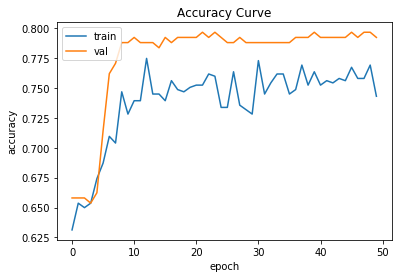

In [462]:
from matplotlib import pyplot as plt
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('Accuracy Curve')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

>After a few epochs, the separation between the curves starts increasing that indicates overfitting.

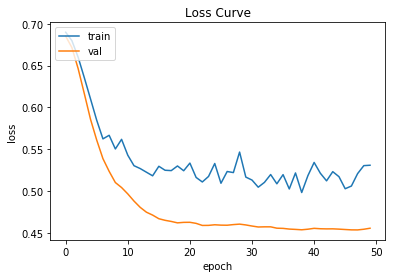

In [463]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss Curve')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

>After a few epochs, the separation between the curves starts increasing that indicates overfitting.

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;END!